In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

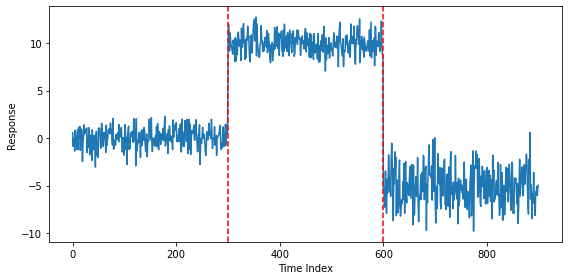

In [38]:
# Sample changepoint plot
data = np.hstack([
    np.random.normal(0, 1, (300,)),
    np.random.normal(10, 1, (300,)),
    np.random.normal(-5, 2, (300,)),
])
plt.figure(figsize=(8, 4))
plt.plot(data)
plt.axvline(300, color='red', linestyle='--')
plt.axvline(600, color='red', linestyle='--')
plt.ylabel('Response')
plt.xlabel('Time Index')
plt.tight_layout()
#plt.savefig('sample.png')
plt.show()

C:\Users\15072\AppData\Local\Temp\ipykernel_4012\406338982.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


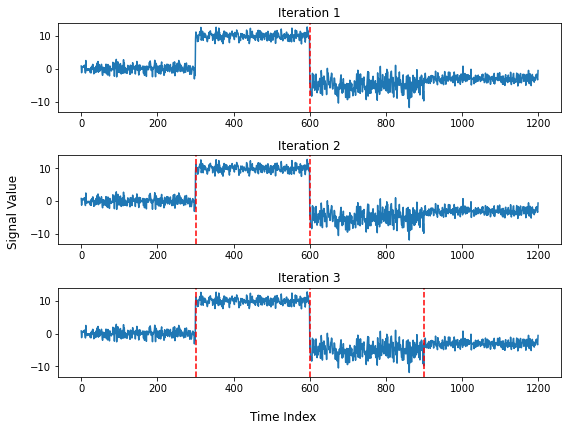

In [51]:
# Sample changepoint plot
data = np.hstack([
    np.random.normal(0, 1, (300,)),
    np.random.normal(10, 1, (300,)),
    np.random.normal(-5, 2, (300,)),
    np.random.normal(-3, 1, (300,)),
])
fig, axs = plt.subplots(3, 1, figsize=(8, 6))

# First iteration
axs[0].plot(data)
axs[0].axvline(600, color='red', linestyle='--')
axs[0].set_title('Iteration 1')

# Second iteration
axs[1].plot(data)
axs[1].axvline(600, color='red', linestyle='--')
axs[1].axvline(300, color='red', linestyle='--')
axs[1].set_title('Iteration 2')

# Third iteration
axs[2].plot(data)
axs[2].axvline(600, color='red', linestyle='--')
axs[2].axvline(300, color='red', linestyle='--')
axs[2].axvline(900, color='red', linestyle='--')
axs[2].set_title('Iteration 3')
# plt.figure(figsize=(8, 4))
# plt.plot(data)
# plt.axvline(300, color='red', linestyle='--')
# plt.axvline(600, color='red', linestyle='--')
# plt.ylabel('Response')
# plt.xlabel('Time Index')
# plt.tight_layout()
# plt.show()

# Saving plot
#fig.tight_layout()
fig.supxlabel('Time Index')
fig.supylabel('Signal Value')
fig.tight_layout()

fig.show()

In [17]:
# Importing data
df = pd.read_csv('synthetic_profile.csv')
df = df.groupby(['seg', 'dist'])
dfs = {i: df.get_group(i) for i in df.groups}

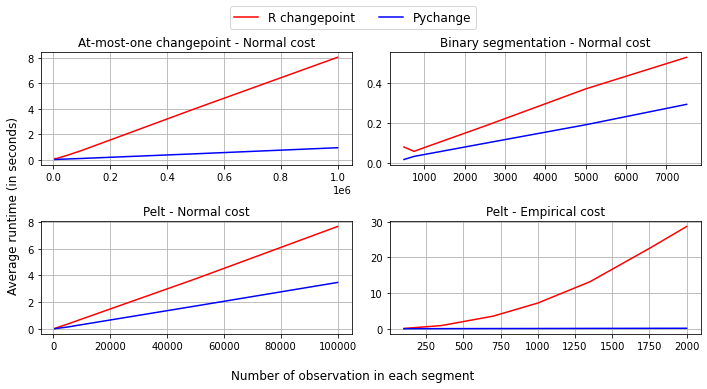

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
fig.supxlabel('Number of observation in each segment')
fig.supylabel('Average runtime (in seconds)')

# AMOC
df = dfs[('AMOC', 'Normal')]
axs[0, 0].set_title('At-most-one changepoint - Normal cost')
axs[0, 0].plot(df['n'], df['r_time'], color='red')
axs[0, 0].plot(df['n'], df['py_time'], color='blue')
axs[0, 0].grid(True)
# BINSEG 
df = dfs[('BinSeg', 'Normal')]
axs[0, 1].set_title('Binary segmentation - Normal cost')
axs[0, 1].plot(df['n'], df['r_time'], color='red')
axs[0, 1].plot(df['n'], df['py_time'], color='blue')
axs[0, 1].grid(True)
# PELT normal
df = dfs[('PELT', 'Normal')]
axs[1, 0].set_title('Pelt - Normal cost')
axs[1, 0].plot(df['n'], df['r_time'], color='red')
axs[1, 0].plot(df['n'], df['py_time'], color='blue')
axs[1, 0].grid(True)
# Pelt ED
df = dfs[('PELT', 'Empirical')]
axs[1, 1].set_title('Pelt - Empirical cost')
l1= axs[1, 1].plot(df['n'], df['r_time'], color='red')
l2 = axs[1, 1].plot(df['n'], df['py_time'], color='blue')
axs[1, 1].grid(True)

fig.legend(('R changepoint', 'Pychange'),
           loc='upper center',
           bbox_to_anchor=(0.5, 1.07),
           ncol=2,
           fontsize='large',
           bbox_transform=fig.transFigure)
plt.tight_layout()
plt.savefig('synthetic.png')
plt.show()

In [56]:
df = pd.read_csv('real_profile.csv')
df = df.groupby(['dataset'])
dfs = {i: df.get_group(i) for i in df.groups}

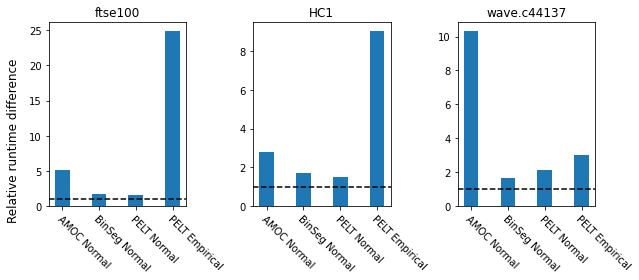

In [58]:
import numpy as np
fig, axs = plt.subplots(1, 3, figsize=(9, 4))
#fig.supxlabel('Segmentation method and cost function')
fig.supylabel('Relative runtime difference')

# ftse100
dfd = dfs['ftse100']
ax = axs[0]
ax.set_title('ftse100')
ax.bar(np.arange(4), dfd['r_time'] / dfd['py_time'], 0.4)
ax.set_xticks(np.arange(4), dfd['seg'] + ' ' + dfd['dist'], rotation = -45, ha="left", rotation_mode="anchor")
ax.axhline(1, color='black', linestyle='--')

# HC1 
dfd = dfs['HC1']
ax = axs[1]
ax.set_title('HC1')
ax.bar(np.arange(4), dfd['r_time'] / dfd['py_time'], 0.4)
ax.set_xticks(np.arange(4), dfd['seg'] + ' ' + dfd['dist'], rotation = -45, ha="left", rotation_mode="anchor")
ax.axhline(1, color='black', linestyle='--')


# wave
dfd = dfs['wave_c44137']
ax = axs[2]
ax.set_title('wave.c44137')
ax.bar(np.arange(4), dfd['r_time'] / dfd['py_time'], 0.4)
ax.set_xticks(np.arange(4), dfd['seg'] + ' ' + dfd['dist'], rotation = -45, ha="left", rotation_mode="anchor")
ax.axhline(1, color='black', linestyle='--')

plt.tight_layout()
#plt.savefig('real.png')
plt.show()